# Titanic Data Exploration

This project was one of assignments for Data Science Nanodegree on Udacity. Here I selected Titanic data to do analysis, which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

## Background

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. (cited from Kaggle: https://www.kaggle.com/c/titanic/)

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. (cited from Kaggle: https://www.kaggle.com/c/titanic/)

In this report, I made analysis of *what sorts of people were likely to survive, namely which variables had strong influence over survival status.*

## Overview


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
path = r'titanic_data.csv'
titanic_data = pd.read_csv(path)
print 'Number of Passengers:', titanic_data.shape[0]
print 'Number of Features:', titanic_data.shape[1]

Number of Passengers: 891
Number of Features: 12


In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


There are 891 passengers in the dataset, with 12 features(PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked). 
Name, Ticket, Cabin should be strings, whereas Survived, Pclass, Sex, Embarked should be categrical data. The rest features are numeric. 
- PassengerId: the number indicating different passengers, it is not important.
- Survived: survival status of a passenger, '0' means deceased, '1' means survived.
- Pclass: class of a passenger, 1 means first class, 2 means second class, 3 means third class.
- Name: name of a passengers, usually including titles.
- Sex: gender, male or female.
- Age: age.
- SibSp: number of siblings and spouses, ranging from 0 to 8.
- Parch: number of parents and children, ranging from 0 to 6.
- Ticket: labels in a ticket, unique.
- Fare: ticket fare.
- Cabin: cabin labels.
- Embarked: to identify where a passenger boards.

In [186]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


PassengerId, Name and Ticket are just labels for a passenger, they are unique for each passenger and do not provide much useful information directly, here we will leave them out in next analysis. Also, there are missing values in Age, Cabin and Embarked, perhaps they were not recorded then or the information was lost along with the ship. Most values of Cabin are missing, and we can skip this feature as well. As for the Age and Embarked, we can fill the missing values with reasonable ones.

In this problem, we focus on what factors can be contributed to the survival status of passengers. Therefore, *Survived* is a dependant variable, which was determined by other factors during the crisis. We'll treat *Pcalss, Sex, Age, SibSp, Parch, Fare and Embarked* as independent variables which might have certain influence over Survived, and explore the relationship between them and Survived through statistic tools and plots.

##  Univariate Analysis


In [188]:
survived_count = sum(titanic_data['Survived'] == 1)
deceased_count = sum(titanic_data['Survived'] == 0)
survived_ratio = survived_count*1.0/(survived_count + deceased_count)
print 'Number of Survivors:', survived_count
print 'Number of Deceased:', deceased_count
print 'Survived Ratio:{0:.3f}'.format(survived_ratio)

Number of Survivors: 342
Number of Deceased: 549
Survived Ratio:0.384


Most passengers in this dataset didn't survive in the disaster. Survived is a little skewed.

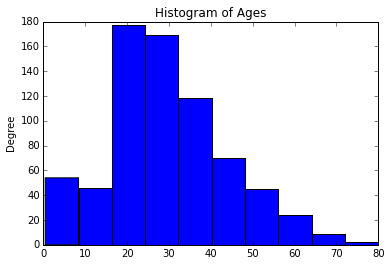

In [189]:
titanic_data['Age'].plot(kind='hist',title='Histogram of Ages')

Age ranges from 0 to 80, which means there were babies and olds in the ship them. It is also right skewed, most ages are between 20 and 40. During the accident, children had priorities on boarding lifeboats, and young people might have more likeliness to get on the lifeboats because of their vigor. So Age may influence the survival status. There are no weird outliers here.

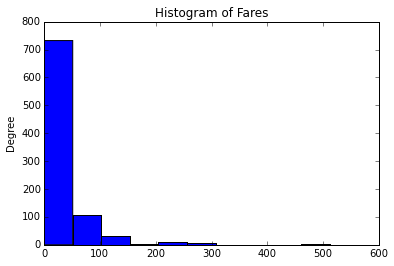

In [190]:
titanic_data['Fare'].plot(kind='hist',title="Histogram of Fares")

Fare is also right skewed, most fares are between 0 to 150. They are some extremely high fares , perhaps they belonged to luxury cabins. Usually, people from higher class tend to pay more for the fares. Perhaps it is related to Pclass, we can check this in bivariate analysis.

In [191]:
titanic_data.Sex.value_counts()

male      577
female    314
dtype: int64

There are more males in this dataset. I remembered in the movie Titanic, gentlemen said "women and children go first" in the accident, so Sex may influence survival status, namely women perhaps survived more than males.

In [192]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
dtype: int64

Most passengers boarded at Gate 'S', a few of them boarded at Gate 'Q'. It is not clear how Embarked gates affected the survival status, perhaps due to the distance to the lifeboats, we can discuss it later.

In [193]:
titanic_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
dtype: int64

In [194]:
titanic_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64

A majority of passengers didn't have parents, children, sisblings nor spouses. It is unclear whether these two factors play significant roles in survival status. We can discuss it later.

In [195]:
titanic_data.Pclass.value_counts()

3    491
1    216
2    184
dtype: int64

Most passengers were from Class 3. I read some information, that passengers from higher class lived close to the deck, which means they had more opportunities to escape. Therefore, Pclass may influence survival status. Also, as mentioned above, Pclass may be related to Fare.

## Bivariate Analysis

In this part, I mainly discussed the relationship between selected varaibles and outcome Survived.

In [7]:
df = titanic_data.groupby('Sex')['Survived'].apply(pd.Series.value_counts, normalize = True)
df

Sex      
female  1    0.742038
        0    0.257962
male    0    0.811092
        1    0.188908
dtype: float64

In [12]:
df = df.unstack()
df.columns = ['Deceased','Survived']
df.plot(kind='bar',stacked=True,title='Survived Status By Sex')

It seems more the most females survived(as much as 75%), whereas most males didn't make it. Therefore, Sex is a very significant factor in terms of survival.

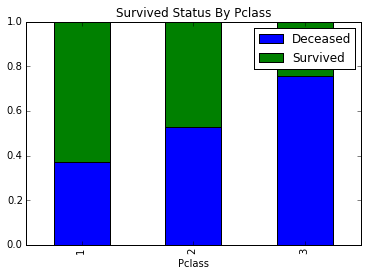

In [14]:
df = titanic_data.groupby('Pclass')['Survived'].apply(pd.Series.value_counts, normalize = True)
df = df.unstack()
df.columns = ['Deceased','Survived']
df.plot(kind='bar',stacked=True,title='Survived Status By Pclass')

It is clear that the majority of passengers in the third class did not survive. Therefore, Pclass is also a significant variable.

In [17]:
df = titanic_data.groupby('Embarked')['Survived'].apply(pd.Series.value_counts, normalize = True)
df

Embarked   
C         1    0.553571
          0    0.446429
Q         0    0.610390
          1    0.389610
S         0    0.663043
          1    0.336957
dtype: float64

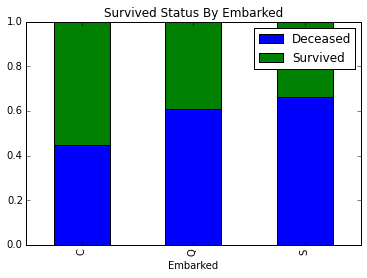

In [18]:
df = df.unstack()
df.columns = ['Deceased','Survived']
df.plot(kind='bar',stacked=True,title='Survived Status By Embarked')

Embarked also has important influence over the survival status. More than half of passengers from Gate 'S' and 'Q' failed to survive, perhaps they were far away from lifeboats or exits.

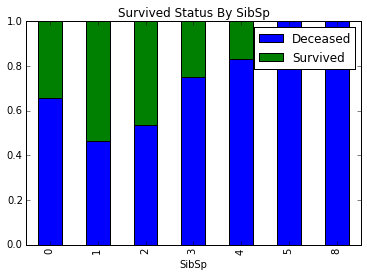

In [23]:
df = titanic_data.groupby('SibSp')['Survived'].apply(pd.Series.value_counts, normalize = True)
df = df.unstack()
df.columns = ['Deceased','Survived']
df.plot(kind='bar',stacked=True,title='Survived Status By SibSp')

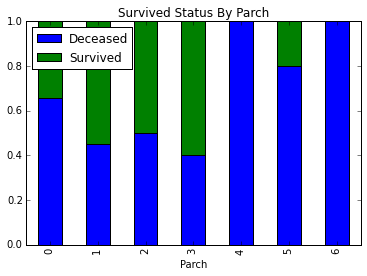

In [22]:
df = titanic_data.groupby('Parch')['Survived'].apply(pd.Series.value_counts, normalize = True)
df = df.unstack()
df.columns = ['Deceased','Survived']
df.plot(kind='bar',stacked=True,title='Survived Status By Parch')

The passengers with more SibSp and Parch were less likely to survive, perhaps they left their opportunities to other family members. But we can't find trend about the survived. Therefore, we will not consider these two variables later on.

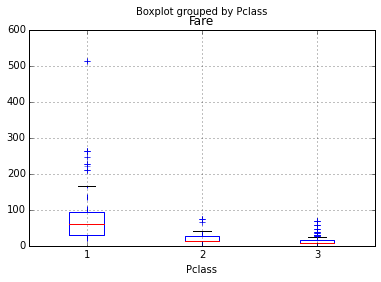

In [112]:
titanic_data.boxplot(by='Pclass',column='Fare')

It seems Fare is quite related with Pclass, higher class passengers spent more money on fares in terms of means, so we only consider Pclass.

In [33]:
bins = [0,3,20,40,50,100]
ages = pd.cut(titanic_data.Age,bins)

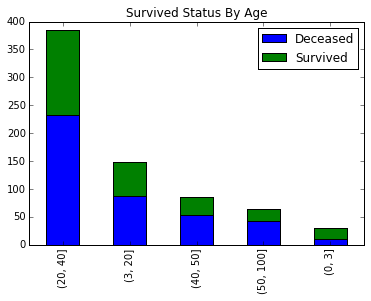

In [28]:
Survived_0 = ages[titanic_data.Survived == 0].value_counts()
Survived_1 = ages[titanic_data.Survived == 1].value_counts()
df = pd.DataFrame({'Survived':Survived_1,'Deceased':Survived_0})
df.plot(kind='bar',stacked=True,title='Survived Status By Age')

We have cut ages into several intervals. It seems babies and toddlers were likely to be rescued. We need use Pearson test to check correlations between variables.

In [155]:
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [161]:
columns = ['Survived','Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']
titanic_data[columns].corr(method='pearson')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


From the Pearson table above, it is true that Pclass is quite correlated with Fare(correlation coeficient is over 0.5), but Fare has little correlation with Age.

## Multivariate Analysis

According to the analysis above, here we only consider the relationship between Survived and variables of Sex, Pclass, Embarked and Age.

In [138]:
titanic_data.groupby(['Sex','Pclass']).Survived.value_counts()

Sex     Pclass   
female  1       1     91
                0      3
        2       1     70
                0      6
        3       1     72
                0     72
male    1       0     77
                1     45
        2       0     91
                1     17
        3       0    300
                1     47
dtype: int64

It is clear from the table above, most female passengers(over 90%) from Pclass 1 and 2 survived, whereas only half of females from Pclass 3 made it. It is very likey that a female from higher class survived in that accident. As for the males, 36.9% from Pclass 1 survived, whereas over 86% from Pclass 3 died, perhaps because passengers from Pclass 3 lived in the bottom of the ship, it was not easy to escape. Therefore, Sex and Pclass can support each other in terms of determining the survival status of passengers.

In [129]:
titanic_data.groupby(['Sex','Embarked']).Survived.value_counts()

Sex     Embarked   
female  C         1     64
                  0      9
        Q         1     27
                  0      9
        S         1    140
                  0     63
male    C         0     66
                  1     29
        Q         0     38
                  1      3
        S         0    364
                  1     77
dtype: int64

Over 87% females who boarded at 'C' survived, whereas most males who boarded at 'Q'(92%) and 'S'(82%) died. It seems more likely to survive if embarked at 'C'.

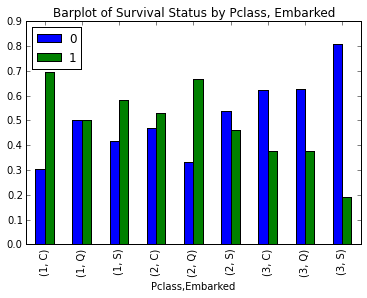

In [30]:
value_counts = titanic_data.groupby(['Pclass','Embarked']).Survived.apply(pd.Series.value_counts, normalize = True)
value_counts.unstack().plot(kind='bar',title='Barplot of Survival Status by Pclass, Embarked')

It seems passenger who were from Pclass 3 and embarked at 'S' had a low rate of survival, whereas first class passengers boarded at 'C' were more likely to survived.

In [173]:
titanic_data.groupby(['Sex','Pclass','Embarked']).Survived.value_counts()

Sex     Pclass  Embarked   
female  1       C         1     42
                          0      1
                Q         1      1
                S         1     48
                          0      2
        2       C         1      7
                Q         1      2
                S         1     61
                          0      6
        3       C         1     15
                          0      8
                Q         1     24
                          0      9
                S         0     55
                          1     33
male    1       C         0     25
                          1     17
                Q         0      1
                S         0     51
                          1     28
        2       C         0      8
                          1      2
                Q         0      1
                S         0     82
                          1     15
        3       C         0     33
                          1     10
                Q         0

This table looks coincident with our precious analysis.

## Who would survive?

Now with variables of Sex, Pclass, Age and Embarked, we try to predict the survival status of passengers. There are only two missing values in Embarked, let's fill them with most frequent value. As for the Age, there are 177 missing values, quite a large number, it can affect the survival status analysis if we fill the 177 missing values. Here we just replace missing ones with median.

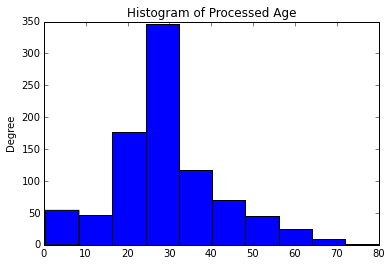

In [36]:
titanic_data.Embarked = titanic_data.Embarked.fillna('S')
titanic_data.Age = titanic_data.Age.fillna(titanic_data.Age.median())
titanic_data.Age.plot(kind='hist',title='Histogram of Processed Age')

The distribution of Age changes if we fill the missing ones with median, more median values appears.

In [211]:
prediction = np.zeros(len(titanic_data))
for i in range(len(titanic_data)):
    passenger = titanic_data.loc[i]
    if passenger.Sex == 'female':
        prediction[i] = 1

np.mean(prediction == titanic_data.Survived)

0.78675645342312006

The prediction accuracy can be as much as 78.7% even if we only use Sex, and suppose each female survived. So, Sex is a very strong variable in terms of prediction.

In [212]:
prediction = np.zeros(len(titanic_data))
for i in range(len(titanic_data)):
    passenger = titanic_data.loc[i]
    if passenger.Sex == 'female' and passenger.Pclass<3: #Women from higher class
        prediction[i] = 1
        
np.mean(prediction == titanic_data.Survived)

0.78675645342312006

In [213]:
prediction = np.zeros(len(titanic_data))
for i in range(len(titanic_data)):
    passenger = titanic_data.loc[i]
    if passenger.Sex == 'female':
        if passenger.Pclass<3:
            prediction[i] = 1
        else:
            if passenger.Embarked!='S': #Women in Pclass 3 tent to survive if not at 'S'
                prediction[i] = 1
        
np.mean(prediction == titanic_data.Survived)

0.81144781144781142

The accuracy looks better if we use Sex, Pclass and Embarked together.

In [178]:
prediction = np.zeros(len(titanic_data))
for i in range(len(titanic_data)):
    passenger = titanic_data.loc[i]
    if passenger.Sex == 'female':
        if passenger.Pclass<3:
            prediction[i] = 1
        else:
            if passenger.Embarked!='S': #Women in Pclass 3 tent to survive if not at 'S'
                prediction[i] = 1
                
    else:
        if passenger.Age<10:
            prediction[i] = 1
        
np.mean(prediction == titanic_data.Survived)

0.81818181818181823

The accuracy improves if we take Age into account, which proves our previous analysis.

## Conclusion

In this project, I tried to figure out which variables could affect the survival status of passengers on Titanic. With some background information, first I selected Pcalss, Sex, Age, SibSp, Parch, Fare and Embarked as independent variables. Then through univariate, bivariate and multivariate analysis, I found Sex, Pclass, Embarked and Age play important roles in determining Survived, namely, women or little chidlren or those from higher class were likely to survive, whereas males from Pclass 3 were unlikely to make it in the disaster. Especially, Sex was very critical, which corresponded the tradition of "Women and Children go first". Finally, I tried to make predictions based on Sex, Pclass, Embarked and Age, the accuracy can reach as much as 81.8%. 

I handled missing values by replacing them with medians, which could affect the distribution of original data, especially of Age(177 missing). The pros of filling missing ones with median is that it will not change the median, but the cons is that it will deviate original data much because there will not be so many identical values in real situation. As for the variables obsoleted, they may contain useful information as well. I ruled out them by comparing plots and Pearson correlation tables, they may have complex relationship. If we can fill the missing ages with more flexible methods, i.e., build a linear model on the other variables, and also extract some useful messages such as titles(which perhaps can reflect ages or status) from Name, Cabin or Ticket, perhaps it will be more accurate to predict passengers' survival status with more supporting factors.

Furthermore, we can use machine learning models such as decision trees, supporting vector machines to analyse the relationship between Survived and other variables in the future.